In [205]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [39]:
#-----------------------------PLOTTING signal resistence---------------------big plot------------------------------------

import pandas as pd
import numpy as np
import plotly.express as px
from matplotlib import pyplot as plt
import seaborn as sns
from plotly.subplots import make_subplots
import plotly.graph_objects as go

#----------------INPUT---------------
SensingMaterial = "LaFeO3"
Anno = "2021"
plot_width = 800
plot_height = 400
selected_period = "by month"

#------------IMPORT---------
dfFBK1 = pd.read_csv('FBK data/data_fbk_from_db.csv', encoding='windows-1252')
dfFBK1.ts = pd.to_datetime(dfFBK1.ts)
dfFBK1 = dfFBK1.dropna()
dfFBK1=dfFBK1.drop(["Unnamed: 0", "node_name", "g", "h", "th", "cfg", "iaq", "co2", "voc", "iac_comp"], axis=1)
dfFBK1["signal_res"] = dfFBK1["signal_res"].astype(float)
dfFBK1["heater_res"] = dfFBK1["heater_res"].astype(float)
dfFBK1["volt"] = dfFBK1["volt"].astype(float)
dfFBK1["t"] = dfFBK1["t"].astype(float)
dfFBK1["rh"] = dfFBK1["rh"].astype(float)
dfFBK1["p"] = dfFBK1["p"].astype(float)
dfFBK1["t"] = dfFBK1["t"].astype(float)

dfFBK1["sensor_description"] = dfFBK1["sensor_description"].str.split(pat="_", n=1).str.get(0)
dfFBK1 = dfFBK1.drop_duplicates(['sensor_description','ts'])
dfFBK1['Data'] = pd.to_datetime(dfFBK1.ts.dt.date)
dfFBK1['Ora'] = str(dfFBK1.ts.dt.time)

dfFBK1ResV = dfFBK1.drop(["p", "rh", "t"], axis=1) #drop Temperature, humidity, pressure
dfFBK1ResV = dfFBK1ResV.groupby(["Data", "sensor_description"]).mean()
dfFBK1ResV = dfFBK1ResV.reset_index()

dfFBK1ResV["Data"] = pd.to_datetime(dfFBK1ResV["Data"])
dfFBK1ResV = dfFBK1ResV.drop(["volt", "heater_res"], axis=1)

fig = go.Figure()
for SensingMaterial, group in dfFBK1ResV.groupby("sensor_description"):
    fig.add_trace(go.Scatter(
        x = dfFBK1ResV[
            dfFBK1ResV["sensor_description"] == SensingMaterial
        ]["Data"],
        y = dfFBK1ResV[
            dfFBK1ResV["sensor_description"] == SensingMaterial
        ]["signal_res"],
        name=SensingMaterial)
    )

fig.update_layout(legend_title_text = "Sensing Material")
fig.update_yaxes(title_text="Value")

fig.show()
dfFBK1ResV


Data sensor_description  signal_res
0  2022-07-29             LaFeO3  111.100000
1  2022-07-29                STN  108.600000
2  2022-07-29             SmFeO3  103.400000
3  2022-07-29               SnO2  500.000000
4  2022-07-29                WO3  147.700000
5  2022-07-29               ZnOR  128.900000
6  2022-08-03             LaFeO3  111.452229
7  2022-08-03                STN  108.826221
8  2022-08-03             SmFeO3  103.734076
9  2022-08-03               SnO2  500.000000
10 2022-08-03                WO3  135.835775
11 2022-08-03               ZnOR  128.852123

In [3]:


#------------SETTING FILTER-------------------------
DataInizioAnno = Anno + "-01-01" #OPTIONAL
DataFineAnno = Anno + "-12-31"

#SETTING UP DF
dfFBK1 = dfFBK1.dropna()
dfFBK1=dfFBK1.drop(dfFBK1.columns[[8,9,10,11,12,13]], axis=1)
dfFBK1["signal_res"] = dfFBK1["signal_res"].astype(float)
dfFBK1["heater_res"] = dfFBK1["heater_res"].astype(float)
dfFBK1["heater_V"] = dfFBK1["heater_V"].astype(float)
dfFBK1["T"] = dfFBK1["T"].astype(float)
dfFBK1["RH"] = dfFBK1["RH"].astype(float)
dfFBK1["P"] = dfFBK1["P"].astype(float)
dfFBK1["T"] = dfFBK1["T"].astype(float)

dfFBK1 = dfFBK1.drop_duplicates(['sensor_description','ts'])
dfFBK1['Data'] = pd.to_datetime(dfFBK1.ts.dt.date)
dfFBK1['Ora'] = str(dfFBK1.ts.dt.time)

dfFBK1ResV = dfFBK1.drop(dfFBK1.columns[[5,6,7]], axis=1) #drop Temperature, humidity, pressure
dfFBK1ResV = dfFBK1ResV.groupby(["Data", "sensor_description"]).mean()
dfFBK1ResV = dfFBK1ResV.reset_index()

dfFBK1ResV["Data"] = pd.to_datetime(dfFBK1ResV["Data"])
dfFBK1ResV = dfFBK1ResV.drop(dfFBK1.columns[[3,4]], axis=1)  #1 index = Data, 2index = sensing material, 3index = signal_res, 4index = heater_res, 5index = heater_V

#dfFBK1Sens = dfFBK1ResV[dfFBK1ResV["sensor_description"] == SensingMaterial]

#--------------------------FILTERING STUFF -----------------------------------------
#dfFBK1Sens = dfFBK1TPH[dfFBK1TPH["sensor_description"] == SensingMaterial]

#dfFBK1TPH = dfFBK1TPH[DataInizioAnno <= dfFBK1TPH.Data]
#dfFBK1TPH = dfFBK1TPH[dfFBK1TPH.Data <= DataFineAnno]
#----------------------------------------------------------------------------------

fig = go.Figure()
for SensingMaterial, group in dfFBK1ResV.groupby("sensor_description"):
    fig.add_trace(go.Scatter(
        x = dfFBK1ResV[
            dfFBK1ResV["sensor_description"] == SensingMaterial
        ]["Data"],
        y = dfFBK1ResV[
            dfFBK1ResV["sensor_description"] == SensingMaterial
        ]["signal_res"],
        name=SensingMaterial)
    )

fig.update_layout(legend_title_text = "Sensing Material")
fig.update_yaxes(title_text="Value")
fig.show()

Data sensing_,material    signal_res
0    2021-01-13            LaFeO3  5.851663e+06
1    2021-01-13               WO3  6.630153e+07
2    2021-01-13               ZnO  4.317466e+07
3    2021-01-13              ZnOR  4.916337e+06
4    2021-01-14            LaFeO3  4.567130e+05
...         ...               ...           ...
2622 2022-07-25            LaFeO3  5.775599e+06
2623 2022-07-25               STN  3.235934e+08
2624 2022-07-25            SmFeO3  3.328304e+07
2625 2022-07-25               WO3  3.555964e+07
2626 2022-07-25              ZnOR  4.979766e+08

[2627 rows x 3 columns]

In [ ]:
if selected_period == "by month":
    dfFBK1 = dfFBK1.groupby(pd.PeriodIndex(dfFBK1['ts'], freq="M"))['Valore'].mean()
    dfFBK1 = dfFBK1.reset_index()
    dfFBK1 = dfFBK1.groupby([dfFBK1.ts.dt.year, dfFBK1.ts.dt.month]).mean()
    dfFBK1.index.names = ["Year", "Month"]
    dfFBK1 = dfFBK1.reset_index()
dfFBK1

In [ ]:

#dfFBK1Sens = dfFBK1ResV[dfFBK1ResV["sensor_description"] == SensingMaterial]

#--------------------------FILTERING STUFF -----------------------------------------
#dfFBK1Sens = dfFBK1TPH[dfFBK1TPH["sensor_description"] == SensingMaterial]

#dfFBK1TPH = dfFBK1TPH[DataInizioAnno <= dfFBK1TPH.Data]
#dfFBK1TPH = dfFBK1TPH[dfFBK1TPH.Data <= DataFineAnno]
#----------------------------------------------------------------------------------

fig = go.Figure()
for SensingMaterial, group in dfFBK1ResV.groupby("sensor_description"):
    fig.add_trace(go.Scatter(
        x = dfFBK1ResV[
            dfFBK1ResV["sensor_description"] == SensingMaterial
        ]["Data"],
        y = dfFBK1ResV[
            dfFBK1ResV["sensor_description"] == SensingMaterial
        ]["signal_res"],
        name=SensingMaterial)
    )

fig.update_layout(legend_title_text = "Sensing Material")
fig.update_yaxes(title_text="Value")
fig.show()

In [204]:
df = pd.read_csv('./data/merged_APPA_data.csv', encoding='windows-1252')
df.groupby(["Stazione", "Inquinante"]).mean()
df["Data"] = pd.to_datetime(df.Data)

df.resample("W", on="Data").mean()

Valore
Data                 
2012-01-01  30.972545
2012-01-08  24.543001
2012-01-15  28.516867
2012-01-22  38.386979
2012-01-29  32.134588
...               ...
2022-06-12  25.408254
2022-06-19  33.208693
2022-06-26  30.805232
2022-07-03  32.940250
2022-07-10  27.684252

[550 rows x 1 columns]

In [241]:
df = pd.read_csv('./data/merged_APPA_data.csv', encoding='windows-1252')

In [233]:
df = pd.read_csv('appa_data_26-07-2022.csv', encoding='windows-1252')

Data
2012-01-01 01:00    34.126316
2012-01-01 02:00    38.105000
2012-01-01 03:00    33.709524
2012-01-01 04:00    31.333333
2012-01-01 05:00    28.531818
                      ...    
2022-07-07 20:00    35.077778
2022-07-07 21:00    32.707407
2022-07-07 22:00    31.151852
2022-07-07 23:00    28.188889
2022-07-08 00:00    28.273077
Freq: H, Name: Valore, Length: 92181, dtype: float64
              Valore
Data Data           
0    0     25.116661
     1     23.739720
     2     22.544733
     3     21.651076
     4     21.027537
...              ...
6    19    31.135356
     20    30.979486
     21    29.851422
     22    28.336707
     23    26.682086

[168 rows x 1 columns]
     WeekDay  Hour     Valore
0          0     0  25.116661
1          0     1  23.739720
2          0     2  22.544733
3          0     3  21.651076
4          0     4  21.027537
..       ...   ...        ...
163        6    19  31.135356
164        6    20  30.979486
165        6    21  29.851422
166        6   

(array([-5.,  0.,  5., 10., 15., 20., 25.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

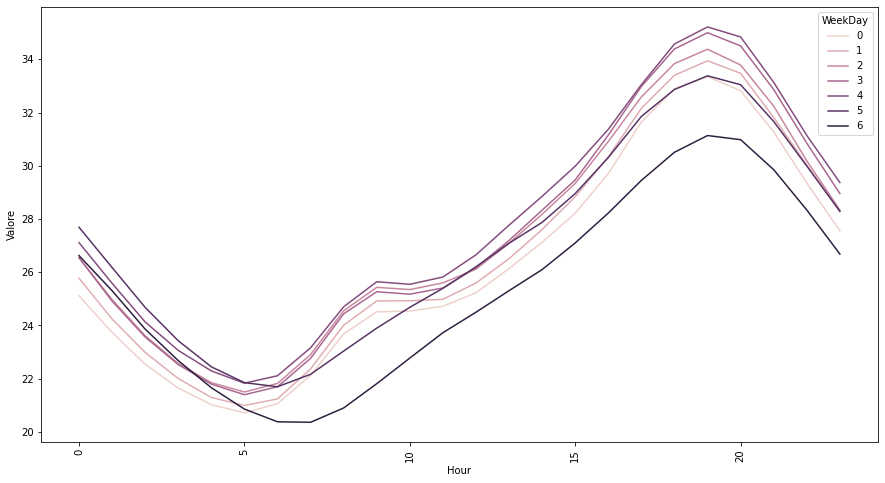

In [242]:
#Plot Dayly  3rd Section
from matplotlib.pyplot import xticks
df = df[df.Valore != "n.d."]
df["Valore"] = pd.to_numeric(df.Valore)
df["Data"] = pd.to_datetime(df.Data)
df_day_avg = df.groupby(pd.PeriodIndex(df['Data'], freq="H"))['Valore'].mean()
print(df_day_avg)
df_day_avg = df_day_avg.reset_index()
df_day_avg = df_day_avg.groupby([df_day_avg.Data.dt.day_of_week, df_day_avg.Data.dt.hour]).mean()
print(df_day_avg)
df_day_avg.index.names = ["WeekDay", "Hour"]
df_day_avg = df_day_avg.reset_index()
print(df_day_avg)
plt.gcf().set_size_inches(15, 8)
sns.lineplot(y="Valore", x="Hour", hue= "WeekDay",data=df_day_avg)
xticks(rotation = 90)

    Month  WeekDay     Valore
0       1        0  27.077524
1       1        1  31.888008
2       1        2  26.919170
3       1        3  29.467453
4       1        4  25.989474
..    ...      ...        ...
79     12        2  23.026604
80     12        3  26.669698
81     12        4  25.668589
82     12        5  29.918551
83     12        6  29.697287

[84 rows x 3 columns]


(array([-1.,  0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

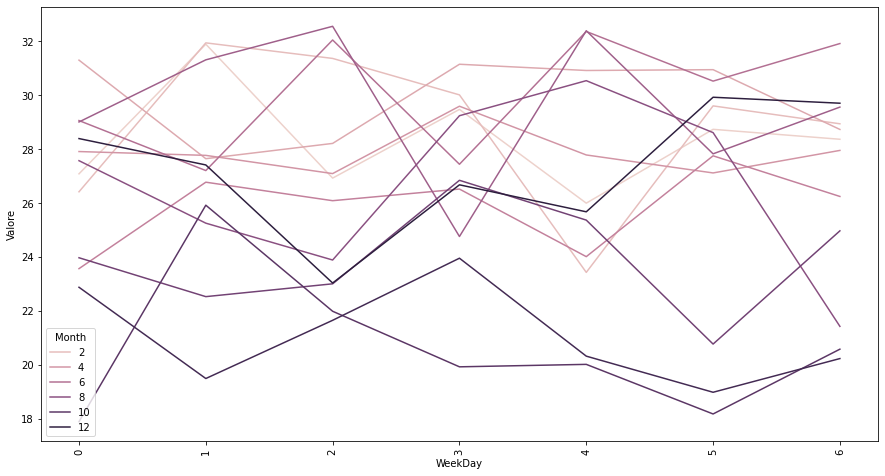

In [212]:
#Plot Weekly  3rd Section
from matplotlib.pyplot import xticks

df = df[df.Valore != "n.d."]
df["Valore"] = pd.to_numeric(df.Valore)
df["Data"] = pd.to_datetime(df.Data)

df_year_avg = df.groupby(pd.PeriodIndex(df['Data'], freq="M"))['Valore'].mean()
df_year_avg = df_year_avg.reset_index()
df_year_avg = df_year_avg.groupby([df_year_avg.Data.dt.month, df_year_avg.Data.dt.day_of_week]).mean()
df_year_avg.index.names = ["Month", "WeekDay"]
df_year_avg = df_year_avg.reset_index()
print(df_year_avg)
plt.gcf().set_size_inches(15, 8)
sns.lineplot(y="Valore", x="WeekDay", hue= "Month",data=df_year_avg)
xticks(rotation = 90)

     Year  Month     Valore
0    2012      1  31.359650
1    2012      2  35.384362
2    2012      3  32.708612
3    2012      4  25.925557
4    2012      5  28.295275
..    ...    ...        ...
122  2022      3  35.355791
123  2022      4  27.224740
124  2022      5  27.324037
125  2022      6  30.083651
126  2022      7  30.989408

[127 rows x 3 columns]


(array([ 0.,  2.,  4.,  6.,  8., 10., 12., 14.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

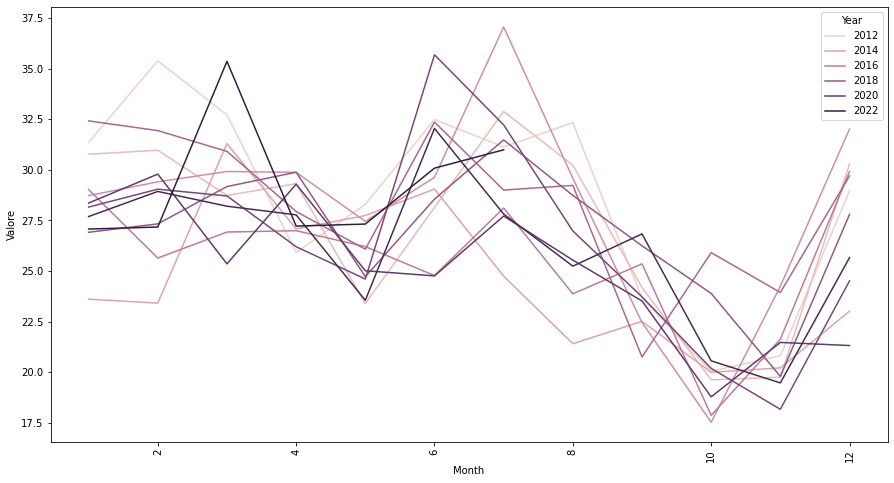

In [199]:
#Plot Monthly 3rd Section
from matplotlib.pyplot import xticks

df = df[df.Valore != "n.d."]
df["Valore"] = pd.to_numeric(df.Valore)
df["Data"] = pd.to_datetime(df.Data)

df_year_avg = df.groupby(pd.PeriodIndex(df['Data'], freq="M"))['Valore'].mean()
df_year_avg = df_year_avg.reset_index()
df_year_avg = df_year_avg.groupby([df_year_avg.Data.dt.year, df_year_avg.Data.dt.month]).mean()
df_year_avg.index.names = ["Year", "Month"]
df_year_avg = df_year_avg.reset_index()
print(df_year_avg)
plt.gcf().set_size_inches(15, 8)
sns.lineplot(y="Valore", x="Month", hue= "Year",data=df_year_avg)
xticks(rotation = 90)

In [1]:
date = "2020"

df = pd.read_csv('./data/merged_APPA_data.csv', encoding='windows-1252')
df = df[df.Valore != "n.d."]

ds_curr_date = df[pd.DatetimeIndex(df['Data']).year == date]
print(ds_curr_date)
ds_curr_date["Valore"] = pd.to_numeric(ds_curr_date.Valore)
ds_curr_date["Data"] = pd.to_datetime(ds_curr_date["Data"])
ds_curr_date = ds_curr_date.set_index('Data') 
print(ds_curr_date)
monthly_summary = ds_curr_date.Valore.resample('W').mean()
print(monthly_summary)
#ds_curr_date = ds_curr_date.groupby(["Stazione", "Inquinante"]).resample("M", on="Data").mean().reset_index()

NameError: name 'pd' is not defined

In [186]:
from matplotlib.pyplot import xticks

df = df[df.Valore != "n.d."]
df["Valore"] = pd.to_numeric(df.Valore)
df["Data"] = pd.to_datetime(df.Data)

In [187]:
df = df.groupby(pd.PeriodIndex(df['Data'], freq="M"))['Valore'].mean()
#df = df.groupby(pd.PeriodIndex(df['Data'], freq="M"))['Valore'].mean()

In [188]:
df

Data
2012-01    31.359650
2012-02    35.384362
2012-03    32.708612
2012-04    25.925557
2012-05    28.295275
             ...    
2022-03    35.355791
2022-04    27.224740
2022-05    27.324037
2022-06    30.083651
2022-07    30.989408
Freq: M, Name: Valore, Length: 127, dtype: float64

In [189]:
df = df.reset_index()

In [190]:
df = df.groupby([df.Data.dt.year, df.Data.dt.month]).mean()
df

Valore
Data Data           
2012 1     31.359650
     2     35.384362
     3     32.708612
     4     25.925557
     5     28.295275
...              ...
2022 3     35.355791
     4     27.224740
     5     27.324037
     6     30.083651
     7     30.989408

[127 rows x 1 columns]

In [191]:
df.index.names = ["Year", "Month"]


In [192]:
df

Valore
Year Month           
2012 1      31.359650
     2      35.384362
     3      32.708612
     4      25.925557
     5      28.295275
...               ...
2022 3      35.355791
     4      27.224740
     5      27.324037
     6      30.083651
     7      30.989408

[127 rows x 1 columns]

In [193]:
df = df.reset_index()


In [194]:
df

Year  Month     Valore
0    2012      1  31.359650
1    2012      2  35.384362
2    2012      3  32.708612
3    2012      4  25.925557
4    2012      5  28.295275
..    ...    ...        ...
122  2022      3  35.355791
123  2022      4  27.224740
124  2022      5  27.324037
125  2022      6  30.083651
126  2022      7  30.989408

[127 rows x 3 columns]

In [161]:
df.dtypes

Year        int64
Month       int64
Valore    float64
dtype: object

(array([ 0.,  2.,  4.,  6.,  8., 10., 12., 14.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

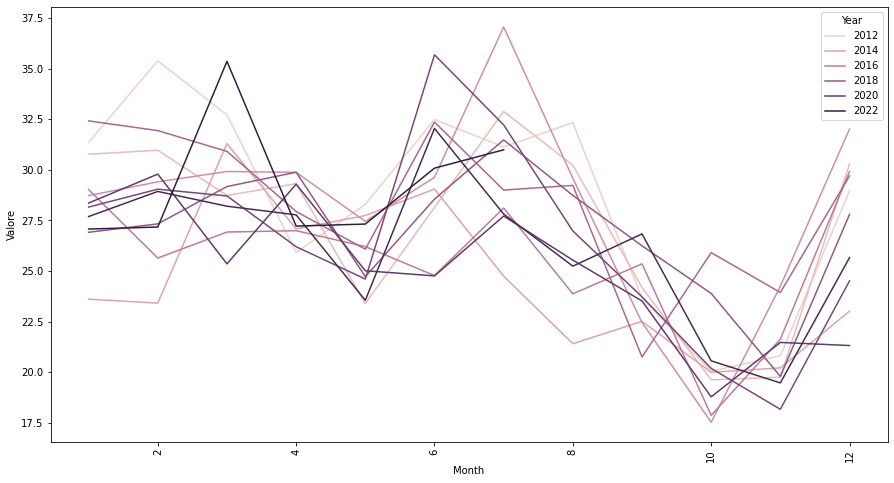

In [195]:
plt.gcf().set_size_inches(15, 8)
sns.lineplot(y="Valore", x="Month", hue= "Year",data=df)
xticks(rotation = 90)

In [66]:

from matplotlib.pyplot import xticks

df = df[df.Valore != "n.d."]
df["Data"] = pd.to_datetime(df['Data']) #.dt.to_period('M')
df_curr = df[df['Data'].dt.year == 2022]

df_curr = df_curr.resample("M", on="Data").mean()
print(df_curr)

df_curr["Valore"] = pd.to_numeric(df_curr.Valore)

plt.gcf().set_size_inches(15, 8)
sns.lineplot(y="Valore", x="Data", data=df_curr)
xticks(rotation = 90)
#df.groupby(pd.PeriodIndex(df['Data'], freq="M"))['Valore'].mean().reset_index()


TypeError: Only valid with DatetimeIndex, TimedeltaIndex or PeriodIndex, but got an instance of 'Index'

In [243]:
from matplotlib.pyplot import xticks

df = df[df.Valore != "n.d."]
df_schiara = df[(df.Stazione == "PA22 (Avio)") & (df.Inquinante == "PM10")]
df["Data"] = pd.to_datetime(df.Data)
df_schiara = df_schiara.resample("Y", on="Data").mean()
df_schiara["Valore"] = pd.to_numeric(df_schiara.Valore)
plt.gcf().set_size_inches(15, 8)
sns.lineplot(y="Valore", x="Data", data=df_schiara)
xticks(rotation = 90)
df_schiara

AttributeError: 'Int64Index' object has no attribute '_with_freq'

0          28.335502
1          28.335502
2          28.335502
3          28.335502
4          28.335502
             ...    
2278753    29.169412
2278754    29.169412
2278755    29.169412
2278756    29.169412
2278757    29.169412
Name: Valore, Length: 2278758, dtype: float64


/tmp/ipykernel_12266/203654240.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_schiara["Valore"] = pd.to_numeric(df_schiara.Valore)


KeyboardInterrupt: 

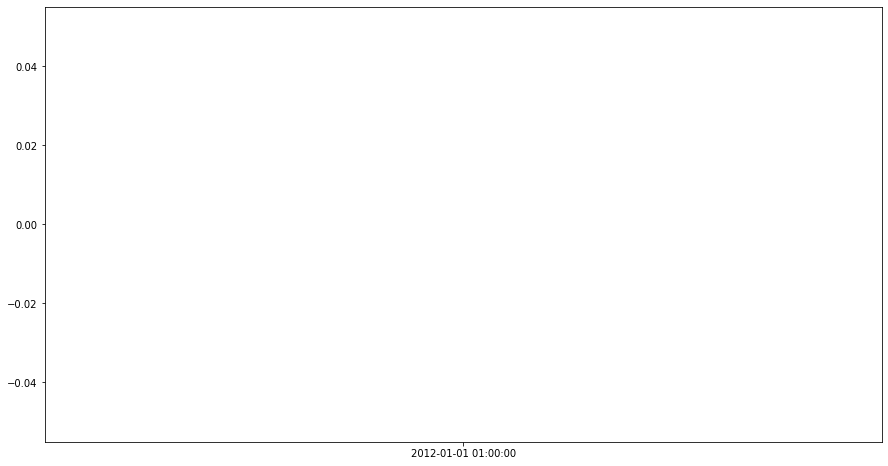

In [55]:
from matplotlib.pyplot import xticks

df = df[df.Valore != "n.d."]
df_schiara = df[df.Stazione == "Parco S. Chiara"]
df["Data"] = pd.to_datetime(df.Data)
#df_schiara = df_schiara.resample("A", on="Data").mean()
res = df.groupby(df.Data.dt.year)['Valore'].transform('mean')
print(res)
df_schiara["Valore"] = pd.to_numeric(df_schiara.Valore)
plt.gcf().set_size_inches(15, 8)
sns.lineplot(y="Valore", x="Data", hue="Stazione", data=df_schiara)
xticks(rotation = 90)

In [25]:
df = pd.read_csv('appa_data_26-07-2022.csv', encoding='windows-1252')

In [109]:
#compare where the conc. of ozone is alarming during the last 3 days

dsCh = (ds.Stazione == "Parco S. Chiara") & (pd.to_numeric(ds.Valore) > 20)
dsBl = (ds.Stazione == "Via Bolzano") & (pd.to_numeric(ds.Valore) > 20)

if dsCh.count() > dsBl.count():
    print("dsCh is bigger")
else:
    print("dsBl is bigger ")

dsBl is bigger 


In [179]:
df = pd.read_csv('appa_data_26-07-2022.csv', encoding='windows-1252')

        Data         Inquinante         Stazione        Ora     Valore
0    2022-01     Biossido Zolfo  Parco S. Chiara  12.499348   3.358540
1    2022-01  Biossido di Azoto       A22 (Avio)  12.501961  52.384314
2    2022-01  Biossido di Azoto  Borgo Valsugana  12.501961  38.360784
3    2022-01  Biossido di Azoto       Monte Gaza  12.500000   2.446615
4    2022-01  Biossido di Azoto  Parco S. Chiara  12.500000  47.881201
..       ...                ...              ...        ...        ...
170  2022-07               PM10   Riva del Garda  12.500000  15.714286
171  2022-07               PM10         Rovereto  12.500000  15.166667
172  2022-07              PM2.5  Borgo Valsugana  12.493976   9.813253
173  2022-07              PM2.5  Parco S. Chiara  12.500000  10.845238
174  2022-07              PM2.5         Rovereto  12.500000  10.892857

[175 rows x 5 columns]


(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, '2022-01'),
  Text(1, 0, '2022-02'),
  Text(2, 0, '2022-03'),
  Text(3, 0, '2022-04'),
  Text(4, 0, '2022-05'),
  Text(5, 0, '2022-06'),
  Text(6, 0, '2022-07')])

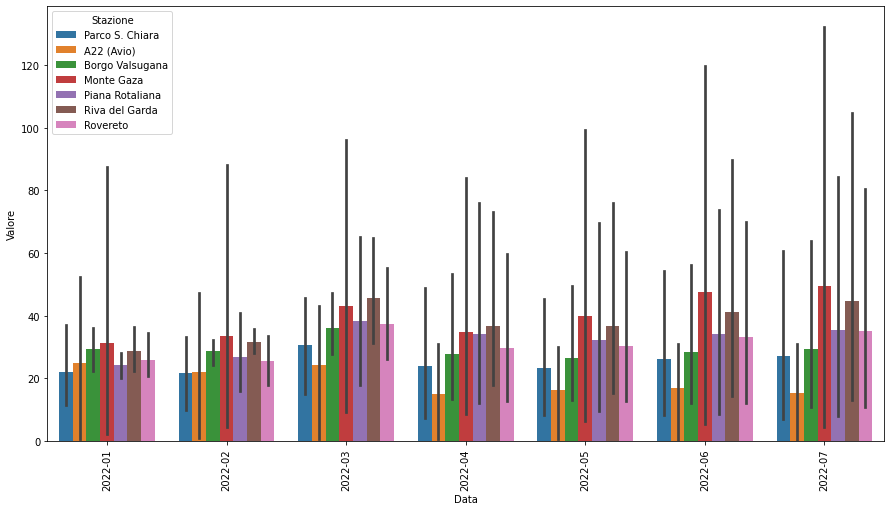

In [44]:
from matplotlib.pyplot import xticks

df = df[df.Valore != "n.d."]
df["Data"] = df.Data.str[0:7]
df["Valore"] = pd.to_numeric(df.Valore)
ds_curr_year = df[df['Data'] >= "2022-01"]
df_month_poll = ds_curr_year.groupby(['Data', "Inquinante", "Stazione"]).mean().reset_index()
print(df_month_poll)
plt.gcf().set_size_inches(15, 8)
sns.barplot(y="Valore", x="Data",  hue="Stazione", data=df_month_poll)
xticks(rotation = 90)

insert a year
insert a month
2022-06


(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Biossido Zolfo'),
  Text(1, 0, 'Biossido di Azoto'),
  Text(2, 0, 'Ossido di Carbonio'),
  Text(3, 0, 'Ozono'),
  Text(4, 0, 'PM10'),
  Text(5, 0, 'PM2.5')])

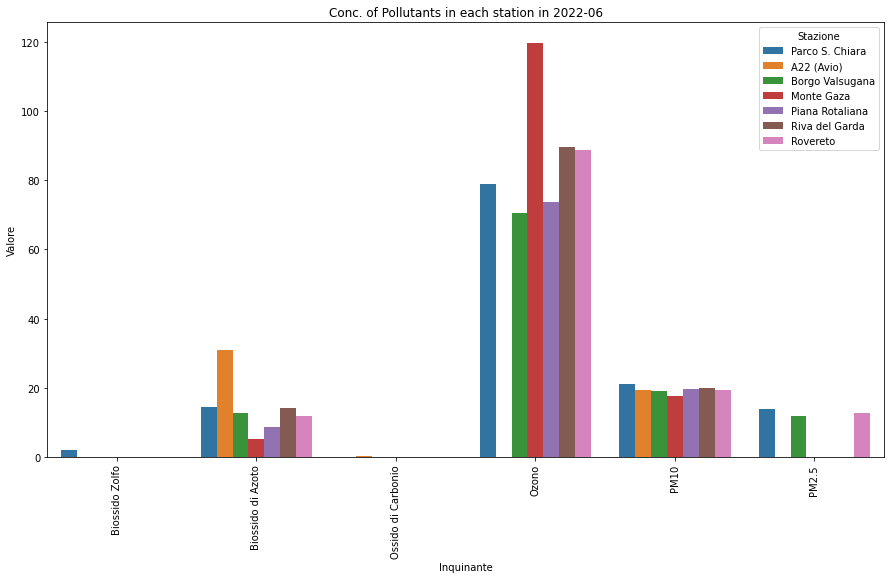

In [21]:
#conc of each poll in a specific month 
from matplotlib.pyplot import xticks

print("insert a year")
year = input()

print("insert a month")
month = input()

if (len(month) < 2) :
    month = month.zfill(2)
    print("result: "+month)
if len(year) < 4 or len(month) > 12:
    raise Exception("Date provided is in the wrong format")

date = year+"-"+month
print(date)

df = df[df.Valore != "n.d."]
df["Data"] = df.Data.str[0:7]
df["Valore"] = pd.to_numeric(df.Valore)
ds_curr_date = df[df['Data'] == date]
df_month_poll = ds_curr_date.groupby(["Inquinante", "Stazione", "Data"]).mean().reset_index()
plt.gcf().set_size_inches(15, 8)
sns.barplot(y="Valore", x="Inquinante", hue="Stazione", data=df_month_poll).set(title="Conc. of Pollutants in each station in " + date)
xticks(rotation = 90)

In [ ]:
df["Data"] = df.Data.str[0:4]
df["Valore"] = pd.to_numeric(df.Valore)
ds_curr_date = df[df['Data'] == date]
df_month_poll = ds_curr_date.groupby(["Inquinante", "Stazione", "Data"]).mean().reset_index()
plt.gcf().set_size_inches(15, 8)
sns.barplot(y="Valore", x="Inquinante", hue="Stazione", data=df_month_poll).set(title="Conc. of Pollutants in each station in " + date)
xticks(rotation = 90)

(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, '2022-01'),
  Text(1, 0, '2022-02'),
  Text(2, 0, '2022-03'),
  Text(3, 0, '2022-04'),
  Text(4, 0, '2022-05'),
  Text(5, 0, '2022-06'),
  Text(6, 0, '2022-07')])

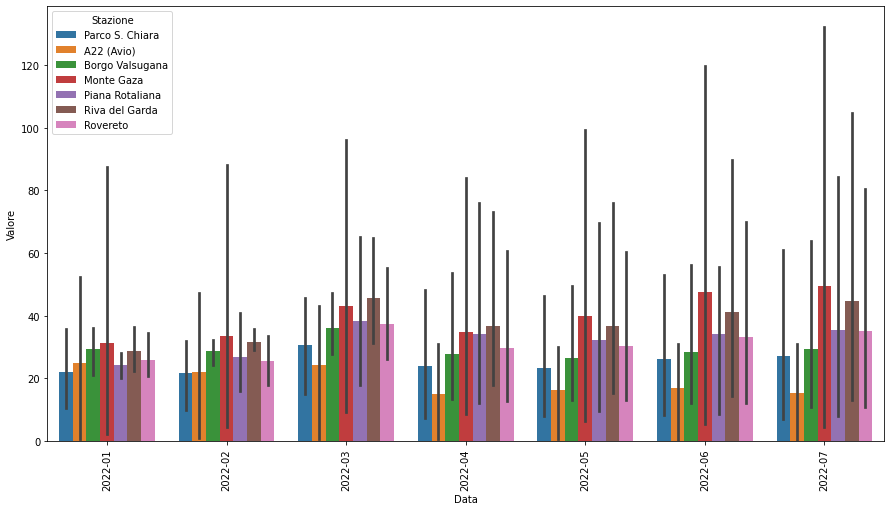

In [9]:
from matplotlib.pyplot import xticks

df = df[df.Valore != "n.d."]
df["Data"] = df.Data.str[0:7]
df["Valore"] = pd.to_numeric(df.Valore)
ds_curr_year = df[df['Data'] >= "2022-01"]
df_month_poll = ds_curr_year.groupby(['Data', "Inquinante", "Stazione"]).mean().reset_index()
plt.gcf().set_size_inches(15, 8)
sns.barplot(y="Valore", x="Data", hue="Stazione", data=df_month_poll)
xticks(rotation = 90)